**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [2]:
FOLDER_REG = "region_active"
FOLDER_ANT = "annotation_ccre"

In [3]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "annotation_enhancer_merge",
    FOLDER_REG,
    "summary")
dir(fdiry)

[1] "peak.summary.ccre_v3.tsv" "peak.summary.ccre_v4.tsv"

In [4]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "annotation_enhancer_merge",
    FOLDER_REG,
    "summary")
fname = "peak.summary.ccre_v4.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_summary = dat
print(dim(dat))
head(dat)

[1] 265837      9


Peak,Annotation,Label,Assay_Type,Assay_Label,Count,Region,Score,Note
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
chr1:10015-10442,ccre_v4,Low-DNase,ATAC,ATAC,1,chr1:10033-10250,0,EH38E2776516:Low-DNase
chr1:16015-16477,ccre_v4,Low-DNase,ATAC,ATAC,1,chr1:16097-16381,0,EH38E3951272:Low-DNase
chr1:17237-17772,ccre_v4,Low-DNase,ATAC,ATAC,1,chr1:17343-17642,0,EH38E3951273:Low-DNase
chr1:28903-29613,ccre_v4,Low-DNase,ATAC,ATAC,1,chr1:29320-29517,0,EH38E3951274:Low-DNase
chr1:115411-115986,ccre_v4,CA-CTCF,"ATAC,ENCODE-E2G_Prediction","ATAC,ENCODE-E2G_Prediction:SAMD11",1,chr1:115562-115912,0,EH38E3951280:CA-CTCF
chr1:118518-118743,ccre_v4,Low-DNase,ATAC,ATAC,1,chr1:118508-118826,0,EH38E3951281:Low-DNase


In [5]:
dat = dat_peak_annot_summary
table(dat$Count)


     1      2      3      4      5      6      7      8      9     10     11 
186509  49233  18049   6966   2876   1275    538    221     94     41     20 
    12     13     14 
     9      3      3 

In [6]:
dat = dat_peak_annot_summary
dat = dat %>% tidyr::separate_longer_delim(Assay_Type, ",")

### count each
dat1 = dat %>%
    dplyr::group_by(Label, Assay_Type) %>%
    dplyr::summarise(Count = sum(Count), .groups = "drop")

### count total
dat2 = dat %>%
    dplyr::group_by(Assay_Type) %>%
    dplyr::summarise(Total = sum(Count), .groups = "drop")

### merge
dat = dat1 %>% 
    dplyr::left_join(dat2, by = "Assay_Type") %>%
    dplyr::mutate(Freq = Count / Total)

dat_ccre_count = dat
print(dim(dat))
head(dat)

[1] 68  5


Label,Assay_Type,Count,Total,Freq
<chr>,<chr>,<dbl>,<dbl>,<dbl>
CA-CTCF,ASTARR,324,25733,0.012590837
CA-CTCF,ATAC,23103,364867,0.063318963
CA-CTCF,CRISPRi-Growth,1007,16883,0.059645798
CA-CTCF,ENCODE-E2G_Benchmark,5,1148,0.004355401
CA-CTCF,ENCODE-E2G_Prediction,5983,120622,0.049601234
CA-CTCF,LMPRA,5918,92588,0.063917570


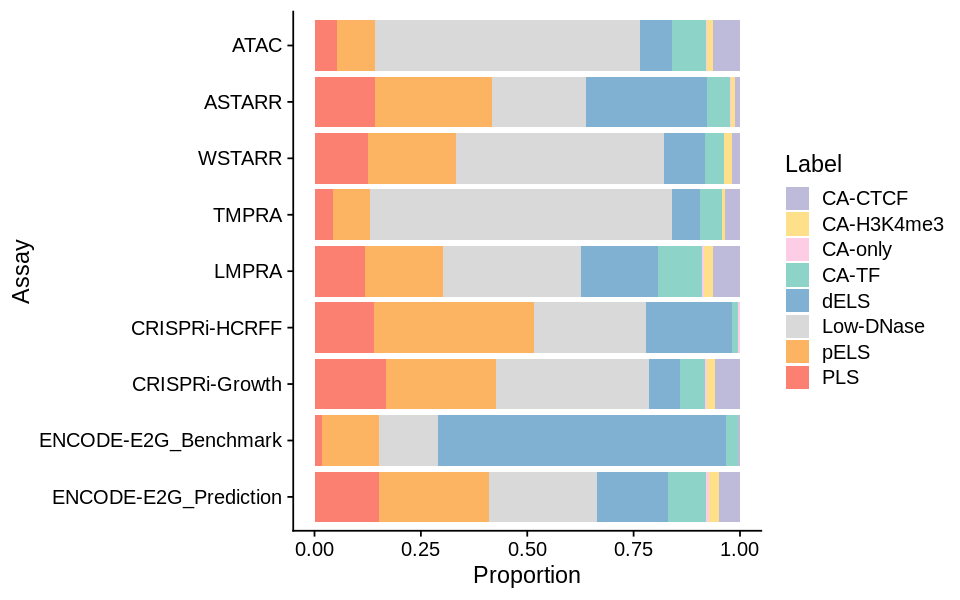

In [16]:
dat = dat_ccre_count

###
vec = c(
    "ATAC", 
    "ASTARR", "WSTARR", "TMPRA", "LMPRA", 
    "CRISPRi-HCRFF", 
    "CRISPRi-Growth", 
    "ENCODE-E2G_Benchmark",
    "ENCODE-E2G_Prediction")

dat = dat %>% dplyr::mutate(Assay_Type = factor(Assay_Type, levels=rev(vec)))

###
vec = c(
    "PLS"        = "#fb8072", 
    "pELS"       = "#fdb462", 
    "dELS"       = "#80b1d3", 
    "CA-TF"      = "#8dd3c7", 
    "CA-H3K4me3" = "#fee08b",  
    "CA-CTCF"    = "#bebada", 
    "CA-only"    = "#fccde5", 
    "Low-DNase"  = "#d9d9d9")
theme_fill = scale_fill_manual(values = vec)

gpt = ggplot(dat, aes(x=Assay_Type, y=Freq, fill=Label)) + 
    geom_col() +
    labs(x="Assay", y="Proportion") +
    coord_flip() +
    theme_cowplot() +
    theme_fill

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)